In [1]:
import requests
import pymongo
import sys
import json
from bson.json_util import dumps
from bson.json_util import loads
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
class Crawler:
    def __init__(self, CITY_CODE = 13000, AREA_CODE = 13096):
        self.CITY_CODE = CITY_CODE
        self.AREA_CODE = AREA_CODE
        self.DEFAULT = DEFAULT = 'https://gateway.chotot.com/v1/public/ad-listing?'
        self.headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

    def run(self):
        error = 0
        data = []
        while (True):
            page = 0
            o = -20
            sys.stdout.write('\nScaned area: %d\n' % (self.AREA_CODE))
            sys.stdout.flush()
            
            while (True):
                page = page + 1
                o = o + 20
                url = self.DEFAULT + 'region_v2' + str(self.CITY_CODE) + '&area_v2=' + str(self.AREA_CODE) + '&cg=1000&o=' + str(o) + '&page=' + str(page) + '&st=s,k&limit=20&key_param_included=true'
                r = requests.get(headers = self.headers, url = url)
                r.json()
                if 0 == len(r.json()['ads']):
                    #sys.stdout.write('\n%s' % 'Close')
                    break
                data.extend(r.json()['ads'])
              
                sys.stdout.write('Scaned items: %d (Total: %d)\r' % (page * 20,  len(data)))
                sys.stdout.flush()
              

            
            if (page == 1):
                error += 1
            if (error > 20):
                break
            self.AREA_CODE += 1
            
        sys.stdout.write('\nFinish with %d items' % (len(data)))
        sys.stdout.flush()
        return data

In [18]:
bot = Crawler(AREA_CODE = 13104)
data2 = bot.run()



Scaned area: 13104

Scaned area: 13105
Scaned items: 4180 (Total: 4166)
Scaned area: 13106
Scaned items: 2940 (Total: 7088)
Scaned area: 13107
Scaned items: 10660 (Total: 17730)
Scaned area: 13108
Scaned items: 10560 (Total: 28290)
Scaned area: 13109
Scaned items: 11100 (Total: 39383)
Scaned area: 13110
Scaned items: 14280 (Total: 53650)
Scaned area: 13111
Scaned items: 4680 (Total: 58316)
Scaned area: 13112
Scaned items: 8000 (Total: 66311)
Scaned area: 13113
Scaned items: 11540 (Total: 77842)
Scaned area: 13114
Scaned items: 20 (Total: 77849)
Scaned area: 13115
Scaned items: 6500 (Total: 84337)
Scaned area: 13116
Scaned items: 4600 (Total: 88924)
Scaned area: 13117
Scaned items: 4140 (Total: 93051)
Scaned area: 13118
Scaned items: 3500 (Total: 96538)
Scaned area: 13119
Scaned items: 20000 (Total: 116538)
Scaned area: 13120
Scaned items: 180 (Total: 116715)
Scaned area: 13121

Scaned area: 13122

Scaned area: 13123

Scaned area: 13124

Scaned area: 13125

Scaned area: 13126

Scaned a

In [20]:
len(data2)

116715

In [221]:
f = open('house.json')
data = json.load(f)


In [8]:
len(data)

146151

### save images


In [9]:

with open('house.json', 'w') as f:
    json.dump(data, f)

In [180]:
images = []
for item in data:
    try:
      
        images.append((item['image'], item['ad_id']))
    except:
        print("An exception occurred")
    
images[0][1]    

An exception occurred


133058981

In [185]:
for image in images:
    r = requests.get(image[0])
    name = str(image[1]) + '.jpg'
    print(name)
    path = 'items/images/'
    if r.status_code == 200:
        with open(path + name, 'wb') as f:
            f.write(r.content)

133058981.jpg
140777355.jpg
136631357.jpg
138681784.jpg
140762741.jpg
139519378.jpg
140730617.jpg
140721140.jpg
129695639.jpg
134344077.jpg
140651977.jpg
140619948.jpg
140616459.jpg
140615283.jpg
140609560.jpg
140323723.jpg
140576675.jpg
140544764.jpg
140542014.jpg
138784704.jpg
127809836.jpg
140476435.jpg
140465533.jpg
137610492.jpg
140405184.jpg
140386431.jpg
140400347.jpg
137235545.jpg
140233387.jpg
140358349.jpg
140315006.jpg
137589352.jpg
140274900.jpg
137135517.jpg
135702264.jpg
140229453.jpg
139223421.jpg
140217227.jpg
140216381.jpg
140190906.jpg
137949770.jpg
131794969.jpg
140115302.jpg
140103837.jpg
140102496.jpg
140079540.jpg
140077925.jpg
140063019.jpg
130075340.jpg
140051623.jpg
140046948.jpg
139766690.jpg
140033704.jpg
140023488.jpg
137139911.jpg
140013627.jpg
140006365.jpg
139993381.jpg
139992583.jpg
134167875.jpg
139982009.jpg
139476144.jpg
139958455.jpg
139958098.jpg
137394630.jpg
137825416.jpg
137251140.jpg
139882128.jpg
139868247.jpg
139863007.jpg
139852252.jpg
138889

## MONGO

In [131]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["bigdata"]
chotot = mydb["chotot"]
chotot_lite = mydb["chotot_lite"]

In [132]:
x = chotot_lite.insert_many(data)

In [179]:
input_data = json.load(open('house_lite.json'))

In [185]:
chotot_lite.insert_many(input_data)

In [184]:
chotot_lite.delete_many({}).deleted_count

146151

In [230]:
start_time = time.time()


myquery = { "area_name": "Quận 10" }

query_cursor = chotot_lite.find(myquery, {'_id': False})
query_list = list(query_cursor)


print("--- %s seconds ---" % (time.time() - start_time))



--- 0.13856267929077148 seconds ---


In [231]:
query_list

[{'list_id': 102240066,
  'list_time': 1671636902000,
  'subject': 'Nhà mới Q10 NGUYỄN TRI PHƯƠNG 4mx9m 3 LẦU NHà mới',
  'category_name': 'Nhà ở',
  'area_name': 'Quận 10',
  'price': 6300000000,
  'price_string': '6,3 tỷ',
  'image': 'https://cdn.chotot.com/6yNvoPd3htlRGyxVu52kkhxwTpIbVVtfKfCPP8dfH0E/preset:listing/plain/4325b7d9a3a17c796bc17f558bc2ffdb-2804540852864510939.jpg',
  'rooms': 4,
  'size': 36,
  'ward_name': 'Phường 4',
  'toilets': 3,
  'floors': 3,
  'width': 4,
  'length': 9,
  'living_size': 93,
  'location': '10.76389,106.66799',
  'longitude': 106.66799,
  'latitude': 10.76389,
  'url': 'https://www.nhatot.com/mua-ban-nha-dat-Quận-10-tp-ho-chi-minh/102240066.htm'},
 {'list_id': 102240002,
  'list_time': 1671636647000,
  'subject': 'Bán căn góc 2 MT ngang 8m đường 3 tháng 2 Q10',
  'category_name': 'Nhà ở',
  'area_name': 'Quận 10',
  'price': 89000000000,
  'price_string': '89 tỷ',
  'image': 'https://cdn.chotot.com/7XyalmjfcN6gaYHHN4arRH6bFfFmBH-e4uDT9gqfumM/prese

## Load full to mini

In [173]:
f = open('house.json')
house = json.load(f)

In [174]:
def del_key(item, key_list):
    for key in key_list:
        try:
            del item[key]
        except:
            pass

In [175]:
def remove_spaces(s):
    s = s.replace(" ", "-")
    return s

In [176]:
def add_link_key(item):
    area_str = ''
    list_id_str = ''
    try:
        area_str = remove_spaces(item['area_name'])
        list_id_str = str(item['list_id'])
    except:
        pass
 
    url = 'https://www.nhatot.com/mua-ban-nha-dat-{area}-tp-ho-chi-minh/{list_id}.htm'
    item['url'] = url.format(area = area_str, list_id = list_id_str)

   

In [177]:
lite = house
for item in lite:
    del_list = ['account_name', 'ad_id', 'date', 'account_oid', 'videos', 'company_ad', 'account_id', 'owner',
               'pty_jupiter', 'contain_videos', 'number_of_images', 'avatar', 'params', '_id', 'furnishing_sell',
               'phone_hidden', 'escrow_can_deposit', 'street_name', 'zero_deposit', 'region', 'region_name',
               'property_legal_document', 'special_display_images', 'special_display', 'protection_entitlement',
               'property_road_condition', 'property_back_condition', 'apartment_type', 'property_status', 'type',
               'direction', 'detail_address', 'body', 'apartment_feature', 'land_feature', 'reviewer_image',
                'landed_type', 'condition_ad', 'condition_ad_name', 'shop', 'balconydirection', 'projectimages',
               'street_id', 'block', 'project_oid', 'projectid', 'unitnumber_display', 'unitnumber', 
               'streetnumber_display', 'address', 'webp_image', 'has_video', 'shop_alias', 'street_number',
               'land_type', 'size_unit', 'commercial_type', 'floornumber', 'house_type', 'category', 'area',
               'region_v2', 'area_v2', 'ward']
    del_key(item, del_list)
    add_link_key(item)

In [178]:
with open('house_lite.json', 'w') as f:
    json.dump(lite, f)

In [169]:
f = open('house_lite.json')
data = json.load(f)

In [170]:
df_full = pd.DataFrame(data)

df_del_list = ['location', 'longitude', 'latitude', 'url']

df = df_full.drop(df_del_list, axis = 1)
print(df.columns)
df.head()

Index(['list_id', 'list_time', 'subject', 'category_name', 'area_name',
       'price', 'price_string', 'rooms', 'size', 'ward_name', 'toilets',
       'floors', 'width', 'length', 'living_size'],
      dtype='object')


,list_id,list_time,subject,category_name,area_name,price,price_string,rooms,size,ward_name,toilets,floors,width,length,living_size
0,100824932,1.671631e+12,Bán nhà đường Trần Khắc Chân q1,Nhà ở,Quận 1,3.850000e+09,"3,85 tỷ",3.0,42.0,Phường Tân Định,1.0,NaN,NaN,NaN,NaN
1,102205282,1.671630e+12,"BÁN GẤP NHÀ ĐẠI HẠ GIÁ NGAY ĐỪƠNG KÝ CON, QUẬN 1",Nhà ở,Quận 1,1.245000e+10,"12,450000008 tỷ",4.0,65.0,Phường Nguyễn Thái Bình,5.0,2.0,5.0,13.0,195.0
2,102237750,1.671629e+12,Độc quyền Một lô *** MT đường Phan Ngữ,Đất,Quận 1,1.000000e+11,100 tỷ,NaN,398.0,Phường Đa Kao,NaN,NaN,22.0,22.0,NaN
3,102236541,1.671626e+12,🆘Nhà Góc 2MT HXH Nguyễn Trãi Quận 1 | Ngang 19m,Nhà ở,Quận 1,2.900000e+10,29 tỷ,1.0,130.0,Phường Nguyễn Cư Trinh,NaN,1.0,NaN,NaN,NaN
4,98665244,1.671626e+12,Cần bán nhà hẻm 3m quận 1 28m2 giá 4.5 tỷ,Nhà ở,Quận 1,4.500000e+09,"4,5 tỷ",2.0,28.0,Phường Cầu Kho,NaN,2.0,3.0,9.0,28.0


In [40]:
df['area_name'].value_counts()

Thành phố Thủ Đức    19997
Quận Gò Vấp          14267
Quận Tân Phú         11531
Quận Bình Thạnh      11093
Quận 12              10642
Quận 7               10633
Quận Bình Tân        10560
Quận Tân Bình         7995
Quận 8                6777
Huyện Bình Chánh      6488
Quận Phú Nhuận        4666
Huyện Củ Chi          4587
Quận 10               4166
Huyện Hóc Môn         4127
Huyện Nhà Bè          3487
Quận 6                3266
Quận 11               2922
Quận 3                2703
Quận 4                2486
Quận 1                2185
Quận 5                1384
Huyện Cần Giờ          177
Name: area_name, dtype: int64

In [69]:
ans = df.query('area_name == "Quận 12" or area_name == "Quận 7"')
len(ans)

21275

In [119]:
start_time = time.time()

ans = df.query('area_name == "Quận 12" and category_name == "Đất"')
len(ans)


q = df.to_json(orient='records')
with open('pandas.json', 'w') as f:
    json.dump(q, f)

print("--- %s seconds ---" % (time.time() - start_time))



--- 0.6815512180328369 seconds ---


In [121]:
q[2]

'"'

In [92]:
import vaex
import time

df2 = vaex.from_pandas(df_full)

In [110]:
start_time = time.time()

ans2 = df2[(df2.area_name == "Quận 12") & (df2.category_name == "Đất")]
len(ans2)
df2.export_json('vaex.json')

print("--- %s seconds ---" % (time.time() - start_time))



--- 1.7958729267120361 seconds ---


In [85]:
df2.select(df2.area_name == "Quận 12")
df2.evaluate(selection=True)

TypeError: DataFrame.evaluate() missing 1 required positional argument: 'expression'

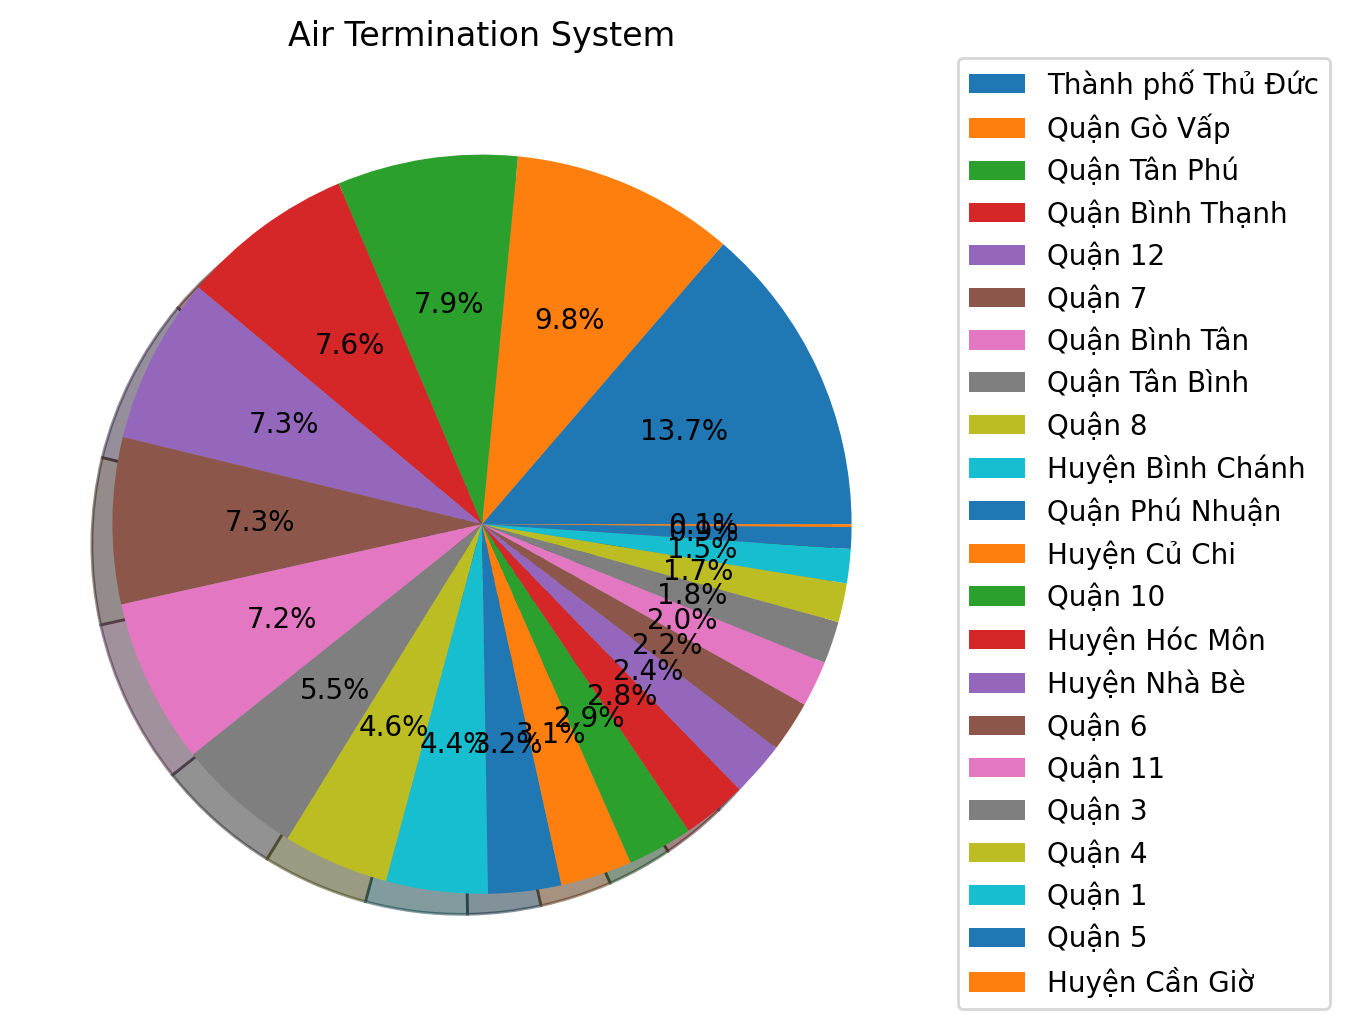

In [19]:
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111)
data = df['area_name'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, legend=True, title='Air Termination System', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [25]:
df_full['location']

0           10.7937,106.69111
1          10.76733,106.69831
2          10.79038,106.69648
3          10.76375,106.68969
4           10.7584,106.68843
                 ...         
146146     10.60037,106.85728
146147     10.61818,106.82604
146148     10.66313,106.77744
146149    10.637923,106.78913
146150     10.41493,106.96135
Name: location, Length: 146151, dtype: object

In [2]:
f = open('house_lite.json')
data = json.load(f)
json_online = []
for dd in data[1:1000]:
    new = {}
    try:
        new['coordinates'] = [dd['longitude'], dd['latitude']]
        new['name'] = dd['subject']
        new['class'] = dd['category_name']
        new['mass'] = int(dd['price'])
        new['year'] = dd['list_time']
        json_online.append(new)
    except:
        pass
    
    
    

In [4]:
with open('house_online.json', 'w') as f:
    json.dump(json_online, f)

In [9]:
import os

In [24]:
os.listdir("")

['app.js',
 'data',
 'icon-cluster-layer.js',
 'index.html',
 'json_online.json',
 'node_modules',
 'package-lock.json',
 'package.json',
 'README.md',
 'webpack.config.js']